## Walmart Store Sales Forecasting

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Walmart-Store-Sales-Forecasting" data-toc-modified-id="Walmart-Store-Sales-Forecasting-1">Walmart Store Sales Forecasting</a></span></li><li><span><a href="#Overview" data-toc-modified-id="Overview-2">Overview</a></span></li><li><span><a href="#1.-Data-Import" data-toc-modified-id="1.-Data-Import-3">1. Data Import</a></span></li><li><span><a href="#2.-Exploratory-Data-Analysis" data-toc-modified-id="2.-Exploratory-Data-Analysis-4">2. Exploratory Data Analysis</a></span><ul class="toc-item"><li><span><a href="#2.1-Temporal-Variations-of-Weekly-Sales" data-toc-modified-id="2.1-Temporal-Variations-of-Weekly-Sales-4.1">2.1 Temporal Variations of Weekly Sales</a></span><ul class="toc-item"><li><span><a href="#2.1.1-Holidays" data-toc-modified-id="2.1.1-Holidays-4.1.1">2.1.1 Holidays</a></span></li><li><span><a href="#2.1.2-Yearly-Variations" data-toc-modified-id="2.1.2-Yearly-Variations-4.1.2">2.1.2 Yearly Variations</a></span></li><li><span><a href="#2.1.3-Monthly-Variations" data-toc-modified-id="2.1.3-Monthly-Variations-4.1.3">2.1.3 Monthly Variations</a></span></li><li><span><a href="#2.1.4-Weekly-Variations" data-toc-modified-id="2.1.4-Weekly-Variations-4.1.4">2.1.4 Weekly Variations</a></span></li></ul></li><li><span><a href="#2.2-Stores-and-Departments" data-toc-modified-id="2.2-Stores-and-Departments-4.2">2.2 Stores and Departments</a></span></li><li><span><a href="#2.3-Store-Type" data-toc-modified-id="2.3-Store-Type-4.3">2.3 Store Type</a></span></li><li><span><a href="#2.4-Other-Factors" data-toc-modified-id="2.4-Other-Factors-4.4">2.4 Other Factors</a></span><ul class="toc-item"><li><span><a href="#2.4.1-CPI-and-Unemployment" data-toc-modified-id="2.4.1-CPI-and-Unemployment-4.4.1">2.4.1 CPI and Unemployment</a></span></li><li><span><a href="#2.4.2-Temperature-and-Fuel_Price" data-toc-modified-id="2.4.2-Temperature-and-Fuel_Price-4.4.2">2.4.2 Temperature and Fuel_Price</a></span></li></ul></li><li><span><a href="#2.5-MarkDowns" data-toc-modified-id="2.5-MarkDowns-4.5">2.5 MarkDowns</a></span></li></ul></li><li><span><a href="#3.-Feature-Engineeing" data-toc-modified-id="3.-Feature-Engineeing-5">3. Feature Engineeing</a></span></li><li><span><a href="#4.-Model-Built" data-toc-modified-id="4.-Model-Built-6">4. Model Built</a></span><ul class="toc-item"><li><span><a href="#4.1-KNN-Regressor" data-toc-modified-id="4.1-KNN-Regressor-6.1">4.1 KNN Regressor</a></span></li><li><span><a href="#4.2-Random-Forest" data-toc-modified-id="4.2-Random-Forest-6.2">4.2 Random Forest</a></span></li><li><span><a href="#4.3-XGBoost" data-toc-modified-id="4.3-XGBoost-6.3">4.3 XGBoost</a></span></li><li><span><a href="#4.4-Model-Tuning" data-toc-modified-id="4.4-Model-Tuning-6.4">4.4 Model Tuning</a></span></li></ul></li><li><span><a href="#5.-Model-Depoyment" data-toc-modified-id="5.-Model-Depoyment-7">5. Model Depoyment</a></span></li></ul></div>

## Overview
Modeling sales data helps to make strategic sales decisions, plan resources in responses to expected demand, create new marketing initiatives, etc. This project is to predict the weekly sales of each department at each store of Walmart based on historical sales data. The features that could be involved includes store number, date, weekly sales, is a holiday or not, etc.  

In [1]:
# read data
import pandas as pd
import numpy as np

# data visualization
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# machine learning packages
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor 
from sklearn.metrics import mean_squared_error 

# ignore warnings
import warnings
warnings.filterwarnings('ignore')

## 1. Data Import

I first imported three datasets, including 'features', 'train', 'store'. 

In 'features' dataset, it includes:
* Store No.
* Date
* Temperature: average temperature in that region
* Fuel_Price: cost of fuel in that region
* Markdowns 1-5 : five anonymized features that are related with certain departments. It is only available after Nov 2011, and is not available for all stores at all time. Each markdown is related with certain departments. 
* CPI: the customer price index around that date
* Unemployment: unemployment rate at that date
* IsHoliday: if that week is a  holiday, there are four holidays included, Super Bowl, Labor Day, Thanksgiving, and Christmas.

I found that besides missing data of Markdowns 1-5, there are also missing data in CPI and Unemployment.

In [2]:
features = pd.read_csv('https://raw.githubusercontent.com/tkkkkkz/Data_Science_Projects/main/Walmart%20Sales%20Forecast/Data/features.csv')
features.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [3]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         8190 non-null   int64  
 1   Date          8190 non-null   object 
 2   Temperature   8190 non-null   float64
 3   Fuel_Price    8190 non-null   float64
 4   MarkDown1     4032 non-null   float64
 5   MarkDown2     2921 non-null   float64
 6   MarkDown3     3613 non-null   float64
 7   MarkDown4     3464 non-null   float64
 8   MarkDown5     4050 non-null   float64
 9   CPI           7605 non-null   float64
 10  Unemployment  7605 non-null   float64
 11  IsHoliday     8190 non-null   bool   
dtypes: bool(1), float64(9), int64(1), object(1)
memory usage: 712.0+ KB


The 'train' dataset is simpler. There are only,
* Store No.
* Dept No.
* Date
* Weekly_Sales: which I will need to forecast 
* IsHoliday

There are no missing data in this dataset.

In [4]:
train = pd.read_csv('https://raw.githubusercontent.com/tkkkkkz/Data_Science_Projects/main/Walmart%20Sales%20Forecast/Data/train.csv')
train.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [5]:
train.info() #train does not miss any data, which is very good

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
dtypes: bool(1), float64(1), int64(2), object(1)
memory usage: 13.3+ MB


The 'stores' dataset includes Type and Size. There are no missing data. There are 45 unique stores in total.

In [6]:
stores = pd.read_csv('https://raw.githubusercontent.com/tkkkkkz/Data_Science_Projects/main/Walmart%20Sales%20Forecast/Data/stores.csv')
stores.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [7]:
stores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Store   45 non-null     int64 
 1   Type    45 non-null     object
 2   Size    45 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 1.2+ KB


After importing three datasets, I will use 'features' to join 'train' on their equal 'Store', 'Date', and 'IsHoliday', then join it with 'stores' on their equal 'Store', to get a training dataset.

In [8]:
train_df = train.merge(features,how='left', left_on=['Date', 'Store', 'IsHoliday'], right_on=['Date', 'Store', 'IsHoliday']).merge(stores, how='left', left_on='Store', right_on='Store')
train_df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
1,1,1,2010-02-12,46039.49,True,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,A,151315
2,1,1,2010-02-19,41595.55,False,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,A,151315
3,1,1,2010-02-26,19403.54,False,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,A,151315
4,1,1,2010-03-05,21827.90,False,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,A,151315


In [9]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421570 entries, 0 to 421569
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
 5   Temperature   421570 non-null  float64
 6   Fuel_Price    421570 non-null  float64
 7   MarkDown1     150681 non-null  float64
 8   MarkDown2     111248 non-null  float64
 9   MarkDown3     137091 non-null  float64
 10  MarkDown4     134967 non-null  float64
 11  MarkDown5     151432 non-null  float64
 12  CPI           421570 non-null  float64
 13  Unemployment  421570 non-null  float64
 14  Type          421570 non-null  object 
 15  Size          421570 non-null  int64  
dtypes: bool(1), float64(10), int64(3), object(2)
memory usage: 51.9+ MB


In [10]:
# transform datetime
train_df['Date'] = pd.to_datetime(train_df['Date'])
train_df['Year'] = train_df['Date'].dt.year
train_df['Month'] = train_df['Date'].dt.month
train_df['Week'] = train_df['Date'].dt.week
train_df['Day'] = train_df['Date'].dt.day

In [11]:
# calculate the percentage of missing data. 
train_df.isna().mean() * 100

Store            0.000000
Dept             0.000000
Date             0.000000
Weekly_Sales     0.000000
IsHoliday        0.000000
Temperature      0.000000
Fuel_Price       0.000000
MarkDown1       64.257181
MarkDown2       73.611025
MarkDown3       67.480845
MarkDown4       67.984676
MarkDown5       64.079038
CPI              0.000000
Unemployment     0.000000
Type             0.000000
Size             0.000000
Year             0.000000
Month            0.000000
Week             0.000000
Day              0.000000
dtype: float64

## 2. Exploratory Data Analysis

First, I plotted a heatmap to present the correlations among numeric and boolean features. It provided a rough guide to analyze each feature.  

Text(0.5, 1.0, 'Correlation Matrix')

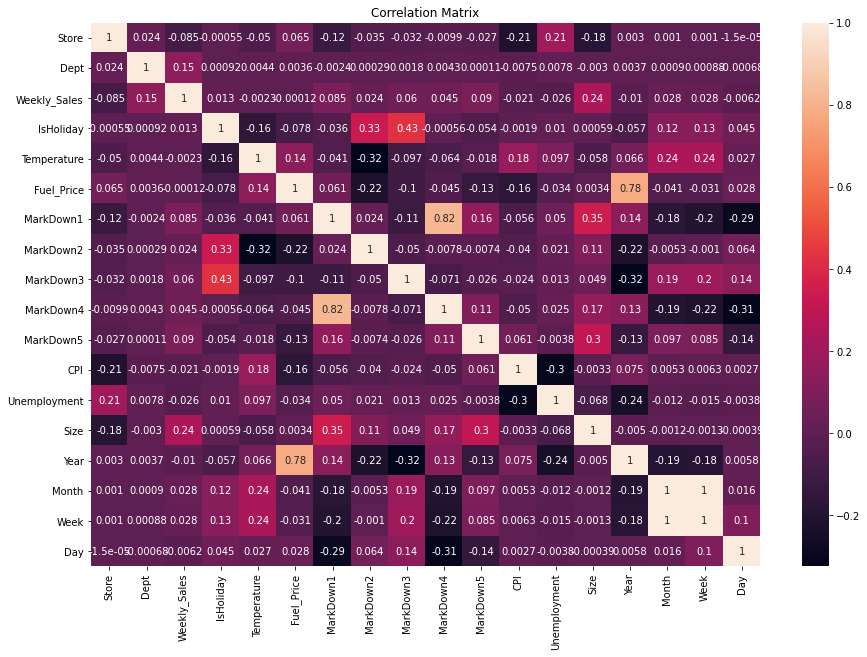

In [12]:
plt.figure(figsize=(15,10))
heatmap = sns.heatmap(train_df.corr(), annot=True)
heatmap.set_title('Correlation Matrix', fontdict={'fontsize': 12})

### 2.1 Temporal Variations of Weekly Sales

The temporal variations of weekly sales of the train data period from Jan 2010 to Dec 2012 is shown in the figure below. 

From the 'mean' plot, we can observe that on the Super Bowl, the weekly sales are higher than the weeks before. Weekly Sales reached a peak on the Labor Day, except in the year of 2010. On Thanksgiving weeks, the weekly sales in both 2010 and 2011 reached peaks, which are the second highest peak in a year. Of course, Christmas holidays introduce the highest sales peak in a year, but it usually happens in the week before the Christmas. That is probably because people usually go shopping and prepare presents earlier than Christmas. 

Therefore, I will mark the week before Christmas as a holiday in the dataset, and mark Christmas week as False. Moreover, I also observed that there are usually a small sales surge in the first week of each month. I will analyze this phenomenon later. 

Text(0.5, -0.1, '(Note: Dahsed lines indicate holidays,including Super Bowl, Labor Day, Thanksgiving, Christmas.)')

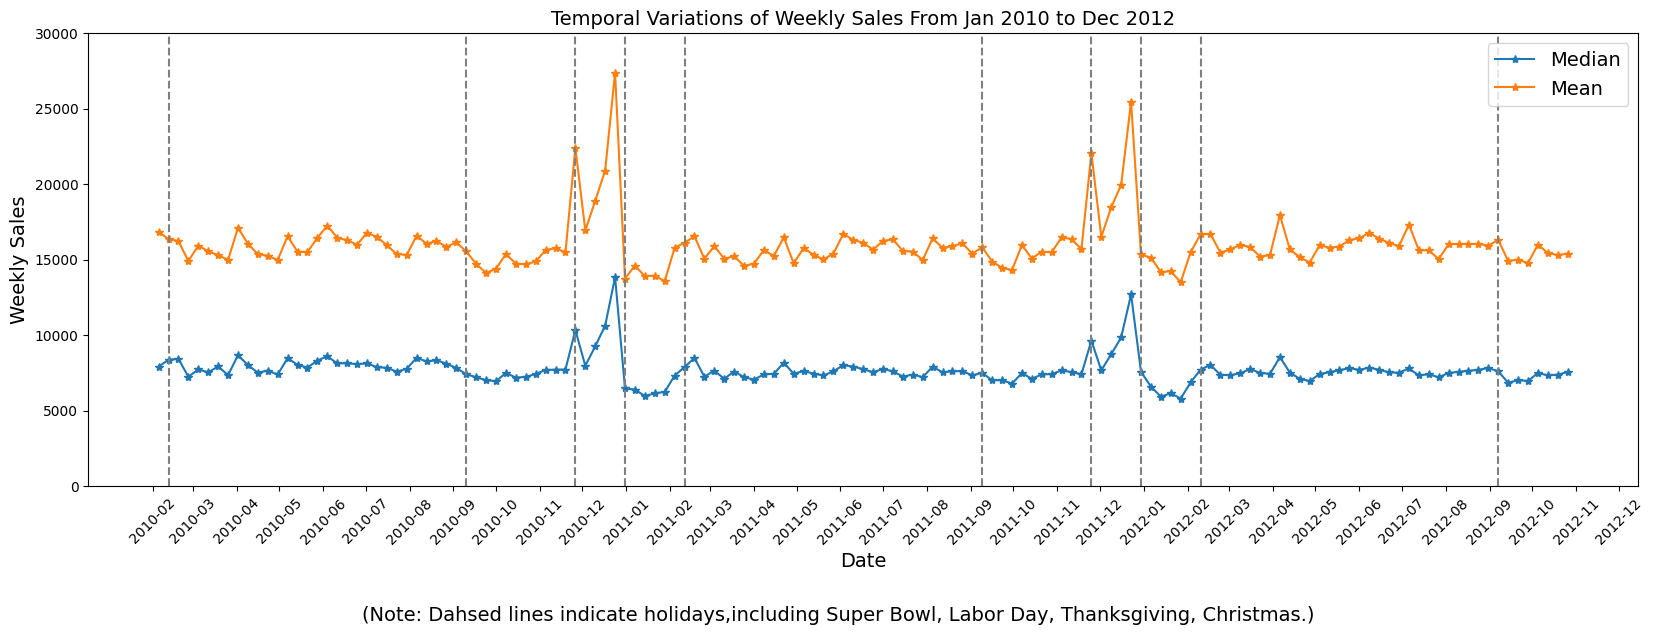

In [13]:
# plot a temporal variation of weekly sales
# first get a dataframe which is grouped by date
sales_by_date = train_df.groupby(['Date']).agg(['median', 'mean'])['Weekly_Sales']

fig, axes = plt.subplots(figsize=(20, 6),dpi=100)

# plot both mean and median time-series trends of weekly sales
axes.plot(sales_by_date.index, sales_by_date['median'], label='Median', marker='*')
axes.plot(sales_by_date.index, sales_by_date['mean'], label='Mean', marker='*')
axes.set_ylabel('Weekly Sales',fontsize=14)
axes.set_ylim(0, 30000)
axes.set_xlabel('Date',fontsize=14)
#axes.set_xlim('2010-01-01', '2012-12-31')

# set x ticks labels
date_period = pd.date_range('2010-02-01', '2012-12-01',freq=pd.offsets.MonthBegin(1))
date_range = [i.to_period("M") for i in date_period]
   
axes.set_xticks(date_period)
axes.set_xticklabels(date_range, rotation=45)
axes.set_title('Temporal Variations of Weekly Sales From Jan 2010 to Dec 2012', fontsize=14)

# plot dashed lines to indicate holidays
holiday_dates = np.array(train_df[train_df['IsHoliday']==True]['Date'].value_counts().index)
#holiday_label = ['Super Bowl', 'Labor Day', 'Thanksgiving', 'Christmas', 'Super Bowl', 'Labor Day', 'Thanksgiving', 'Christmas', 'Super Bowl', 'Labor Day']
#holiday_color = ['black', 'grey', 'red', 'green', 'black', 'grey', 'red', 'green', 'black', 'grey']
for h_date in holiday_dates:
    axes.axvline(h_date, color='grey', ls='--')

plt.legend(fontsize=14,loc='upper right')
plt.figtext(0.5, -0.1, '(Note: Dahsed lines indicate holidays,including Super Bowl, Labor Day, Thanksgiving, Christmas.)', ha='center', fontsize=14)

We can observe the sale increase in week 47 (thanksgiving), week 51 (christmas), week 6(super bowl), week 36(labor day), 

#### 2.1.1 Holidays

As stated before, the week before Christmas should be labeled 'True' for 'IsHoliday', whereas the Christmas week should be labeled 'False'. Clearly, when there are holidays, the weekly sales increase correspondingly. This feature will be analyzed combing with other features. 

In [14]:
# find the weeks of Christmas Holiday are are the 52th week
train_df[(train_df['IsHoliday'] == True) & (train_df['Month'] == 12)]['Week'].value_counts()

# mark week 51 as holiday, mark week 52 as not holidays
train_df['IsHoliday'] = np.where(train_df['Week'] == 51, True, train_df['IsHoliday'])
train_df['IsHoliday'] = np.where(train_df['Week'] == 52, False, train_df['IsHoliday'])

#### 2.1.2 Yearly Variations

Since in the train data, we only have three years. From the data, we can find that weekly sales in 2010 is the most, followed by year 2011 and year 2012. Though there is a linear relationship between them, I hypothesized the year itself does not affect the weekly sales, but the events, conditions of the year affect the weekly sales. Therefore, I will not include 'Year'as a feature in the modeling. 

Text(0.5, 1.0, 'Average Weekly Sales in Year 2010, 2011, and 2012')

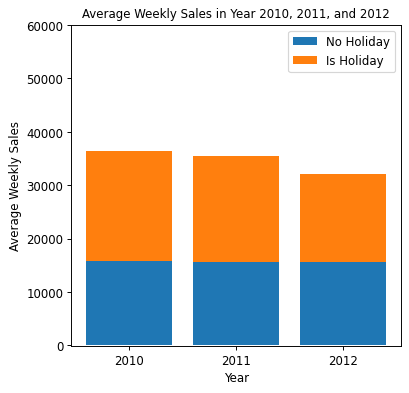

In [15]:
# prepare dataframe of average weekly sales in different years
year_sales_noholiday= train_df[train_df['IsHoliday']==False].groupby('Year').mean()['Weekly_Sales']
year_sales_isholiday = train_df[train_df['IsHoliday']==True].groupby('Year').mean()['Weekly_Sales']

# bar plot
fig, axes = plt.subplots(figsize=(5, 5), dpi=85)

axes.bar(year_sales_noholiday.index, year_sales_noholiday.values, label = 'No Holiday')
axes.bar(year_sales_isholiday.index, year_sales_isholiday.values, label='Is Holiday', bottom=year_sales_noholiday.values)
axes.set_ylim(-5, 60000)
axes.set_ylabel('Average Weekly Sales', fontsize=10)
axes.set_xlabel('Year', fontsize=10)
axes.set_xticks([2010, 2011, 2012])

axes.legend()
plt.title('Average Weekly Sales in Year 2010, 2011, and 2012', fontsize=10)


#### 2.1.3 Monthly Variations

The average weekly sales per month is shown in below figure. The weekly sales increases in Nov and Dec because of Thanksgiving and Christmas, following with a decrease in Jan. In the other months, the average weekly sales are stable. 

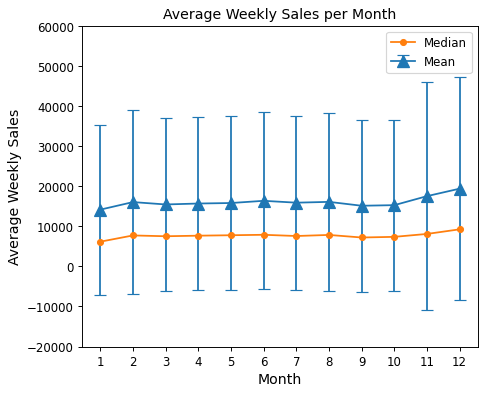

In [16]:
# prepare a dataset of average weekly sales per month
monthly_sales = train_df.groupby('Month').agg(['mean', 'median', 'std'])

# plot line plots to show the trend
fig, axes = plt.subplots(figsize=(6, 5), dpi=85)
axes.errorbar(monthly_sales.index, monthly_sales['Weekly_Sales']['mean'], monthly_sales['Weekly_Sales']['std'],marker='^', capsize=5,markersize=10, label='Mean')
axes.plot(monthly_sales.index, monthly_sales['Weekly_Sales']['median'], marker='.', label='Median', markersize=10)

axes.set_ylim(-20000, 60000)
axes.set_ylabel('Average Weekly Sales', fontsize=12)
axes.set_xlabel('Month', fontsize=12)
axes.set_xticks([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12])
axes.set_title('Average Weekly Sales per Month')

plt.legend(loc='upper right')

#### 2.1.4 Weekly Variations

Among 52 weeks, I found that holidays are on week 6 (super bowl), week 36 (labor day), week 47 (thanksgiving), and week 51(Christmas eve week), respectively. On holidays, weekly sales surged to different extents. 

Besides those, from the figure 4 below, I also found that on week 18, week 22, week 27, week 40, there are also obvious increases in all three years. Among those weeks, week 27 is when the Independent Day Holiday is. Therefore, in the following dataset, I will also mark week 27 as a holiday.

In [17]:
# find which weeks holidays are in
# superbowl week 6
train_df[(train_df['Month'] == 2) & (train_df['IsHoliday'] == True)]['Week'].value_counts()

# labor day week 36
train_df[(train_df['Month'] == 9) & (train_df['IsHoliday'] == True)]['Week'].value_counts()

# thanksgiving  week 47
train_df[(train_df['Month'] == 11) & (train_df['IsHoliday'] == True)]['Week'].value_counts()

# christmas week 51
train_df[(train_df['Month'] == 12) & (train_df['IsHoliday'] == True)]['Week'].value_counts()

51    5983
Name: Week, dtype: int64

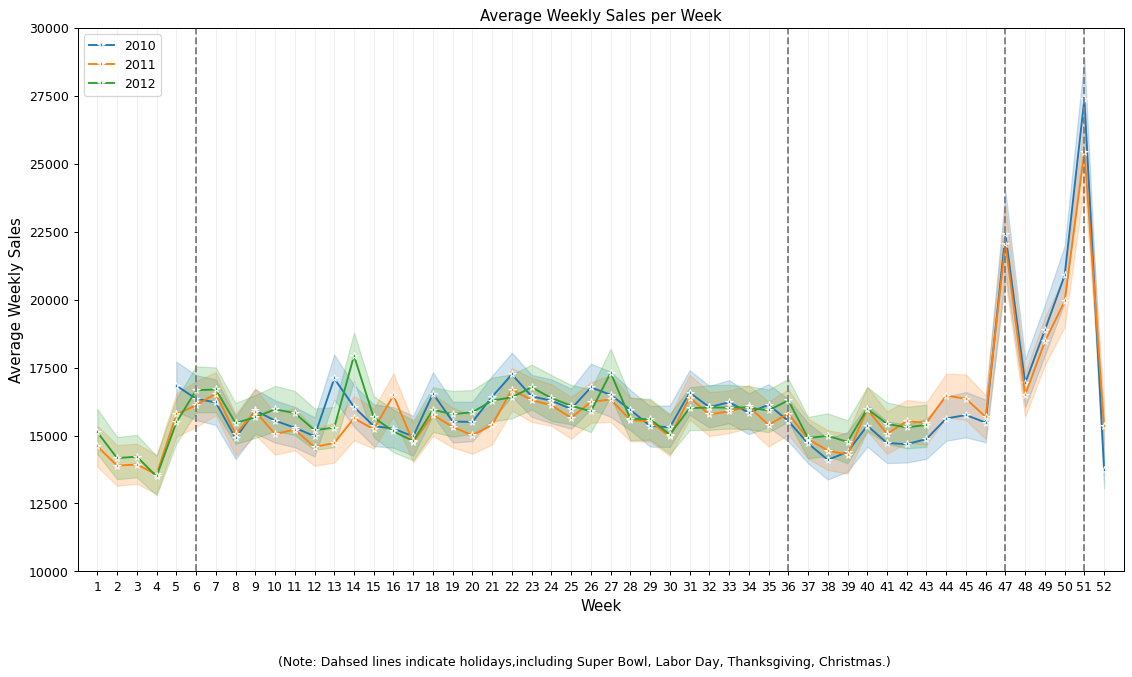

In [18]:
# plot weekly trends of average weekly sales in all three years
fig, axes = plt.subplots(figsize=(15, 8), dpi=90)

sns.lineplot(x='Week', y='Weekly_Sales', data=train_df[train_df['Year']==2010], marker = '*', label='2010')
sns.lineplot(x='Week', y='Weekly_Sales', data=train_df[train_df['Year']==2011], marker= '*', label='2011')
sns.lineplot(x='Week', y='Weekly_Sales', data=train_df[train_df['Year']==2012], marker='*', label='2012')

axes.set_xticks(range(1, 53))
axes.set_xlim(0, 53)
axes.set_ylim(10000, 30000)
axes.grid(axis='x', which='major', alpha=0.2)
axes.set_xlabel('Week',fontsize=12)
axes.set_ylabel('Average Weekly Sales', fontsize=12)

for week in [6, 36, 47, 51]:
    axes.axvline(week, color='grey', ls='--')

axes.set_title('Average Weekly Sales per Week', fontsize=12)
plt.figtext(0.5, -0.005, '(Note: Dahsed lines indicate holidays,including Super Bowl, Labor Day, Thanksgiving, Christmas.)', ha='center', fontsize=10)
plt.legend()

In [19]:
# mark week 27-- the independent day as is holiday
train_df['IsHoliday'] = np.where(train_df['Week'] == 27, True, train_df['IsHoliday'])

### 2.2 Stores and Departments

There are 45 stores are in this dataset. The average weekly sales are very different among all the stores. The comparison among stores are almost the same in holidays and non holidays. For example, the store 20 has the highest weekly sales in both holidays and non-holidays, and the store 5 has the lowest weekly sales in both holidays and non holidays.

There are 81 departments in total. In the figure below, in some departments like,4, 5, 7,13,17 72,92, etc, their weekly sales during holidays are larger than those days are not holidays. But in some departments, like, 2, 16, 38, 40, 46, 65, their regular days sales are actually better than days during holidays. 

In [20]:
# calculate the number of stores
train_df['Store'].nunique()

45

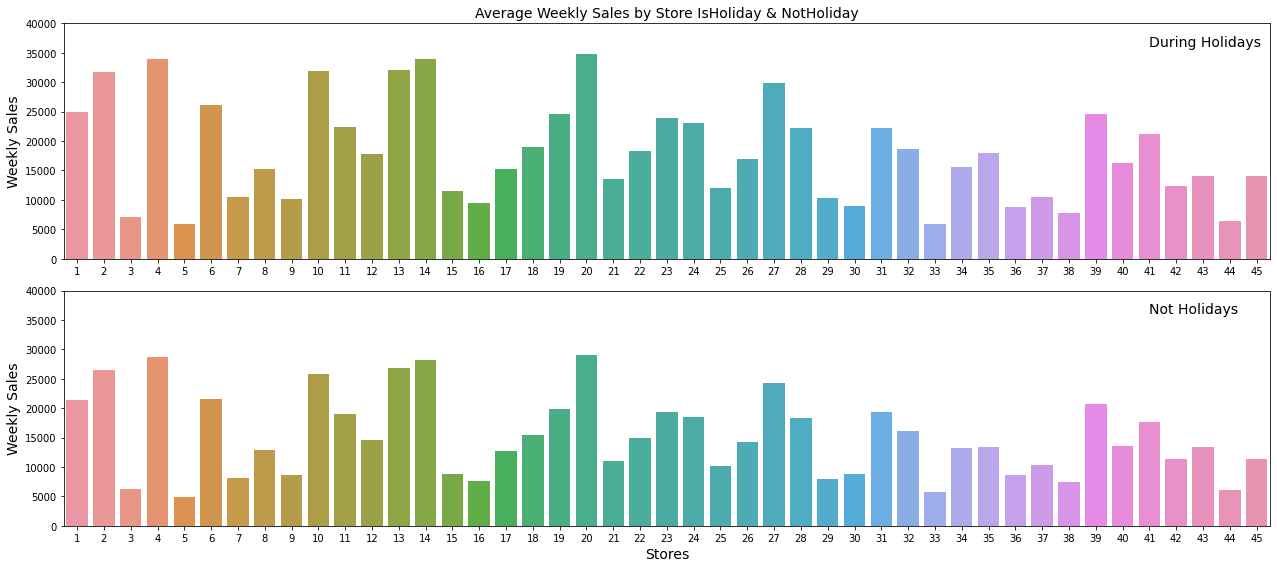

In [21]:
weekly_sales_store_isholiday = train_df[train_df['IsHoliday'] == True].groupby('Store').mean()['Weekly_Sales']
weekly_sales_store_notholiday = train_df[train_df['IsHoliday'] == False].groupby('Store').mean()['Weekly_Sales']

fig, axes = plt.subplots(2, 1, figsize=(18, 8))
sns.barplot(x=weekly_sales_store_isholiday.index, y=weekly_sales_store_isholiday, ax=axes[0])
#sns.barplot(x=weekly_sales_store_notholiday.index, y=weekly_sales_store_notholiday, ax=axes[0])
axes[0].set_title(label='Average Weekly Sales by Store IsHoliday & NotHoliday', fontsize=14)
axes[0].set_ylabel('Weekly Sales', fontsize=14)
axes[0].set_xlabel('')
axes[0].set_ylim(0, 40000)

sns.barplot(x=weekly_sales_store_notholiday.index, y=weekly_sales_store_notholiday, ax=axes[1])
axes[1].set_xlabel('Stores', fontsize=14)
axes[1].set_ylabel('Weekly Sales', fontsize=14)
axes[1].set_ylim(0, 40000)

for i, label in enumerate(('During Holidays', 'Not Holidays')):
    axes[i].text(0.90, 0.95, label, transform=axes[i].transAxes, fontsize=14, va='top')


plt.tight_layout()
plt.show()

In [22]:
# calculate the number of departments. 
train_df['Dept'].nunique()

81

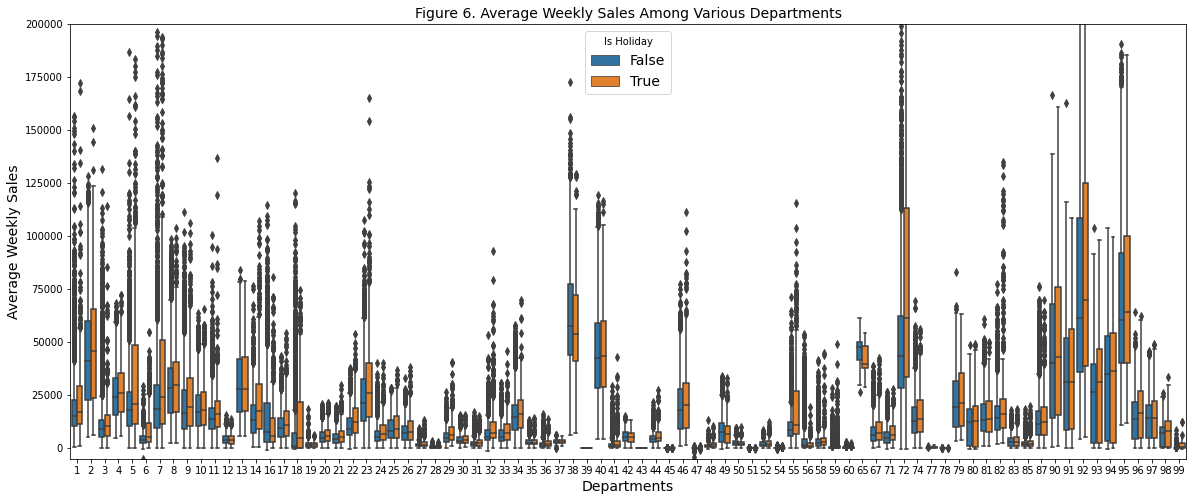

In [23]:
fig, axes = plt.subplots(figsize=(20, 8))

sns.boxplot(x='Dept', y='Weekly_Sales', data=train_df, hue='IsHoliday')
axes.set_ylim(-5000, 200000)
axes.set_ylabel('Average Weekly Sales', fontsize=14)
axes.set_xlabel('Departments', fontsize=14)
axes.set_title('Figure 6. Average Weekly Sales Among Various Departments', fontsize=14)

plt.legend(fontsize=14, title='Is Holiday')

### 2.3 Store Type

It is unknown how store types are classified. But it is hypothesized to be highly related with store size. The following analysis proved it is correct.

[(25000.0, 225000.0), Text(0.5, 1.0, 'Figure 7. Store Size VS Type')]

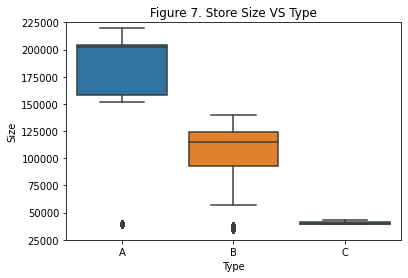

In [24]:
# realtions between store type and size
size_type = sns.boxplot(x='Type', y='Size', data=train_df)
size_type.set(title='Figure 7. Store Size VS Type', ylim=(25000, 225000))

In [25]:
# store #33 and #36 are outliers of Type A
train_df[(train_df['Type']=='A') & (train_df['Size'] < 50000)]['Store'].unique()

array([33, 36])

In [26]:
#store 3 and store 5 are the outliers of Type B
train_df[(train_df['Type']=='B')&(train_df['Size']<50000)]['Store'].unique()

array([3, 5])

In [27]:
# reassign outliers in Type A and Type B to Type C
train_df['Type'] = np.where((train_df['Type']=='A')&(train_df['Size']<50000), 'C', train_df['Type'])
train_df['Type'] = np.where((train_df['Type']=='B')&(train_df['Size']<50000), 'C', train_df['Type'])

Text(0.5, 1.0, 'Distributions of Weekly Sales in Stores of Types A, B, and C')

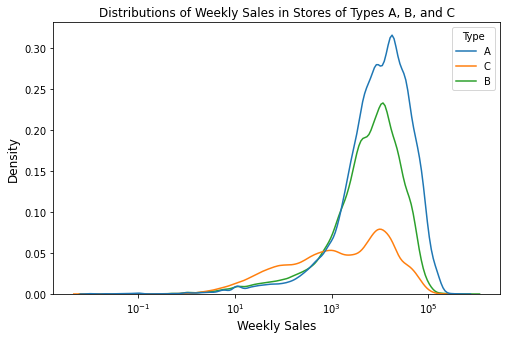

In [28]:
positive_sales = train_df[train_df['Weekly_Sales']>0]
fig, axes = plt.subplots(figsize=(8, 5))
# sns.boxplot(x='Type', y='Weekly_Sales', data=train_df, hue='IsHoliday')
# axes.set_ylim(-100000, 500000)
sns.kdeplot(data=positive_sales[['Weekly_Sales', 'Type']], x='Weekly_Sales',hue='Type', log_scale=True)
axes.set_xlabel('Weekly Sales', fontsize=12)
axes.set_ylabel('Density', fontsize=12)
axes.set_title('Distributions of Weekly Sales in Stores of Types A, B, and C', fontsize=12)

### 2.4 Other Factors 

#### 2.4.1 CPI and Unemployment

The Consumer Price Index (CPI) is a measure of the average change overtime in the prices paid by urban consumers for a market basket of consumer goods and services.Therefore, it is rational to hypothesize that if the CPI increases, the weekly sales would increase.I observed delicate trend between unemployment and weekly_sales.  


In [29]:
# cpi_unemployment = sns.pairplot(train_df[['Weekly_Sales', 'CPI', 'Unemployment', 'IsHoliday']], hue='IsHoliday')

# cpi_unemployment.set(title = 'Relationships Among the Weekly Sales, CPI and Unemployment')

#### 2.4.2 Temperature and Fuel_Price

When temperature are moderate, the weekly sales are higher, while temperature are higher or lower, the weekly sales tend to drop. The correlation between them are very weak, so I may drop them in my future analysis. 

In [30]:
# temperature_fuel = sns.pairplot(train_df[['Weekly_Sales', 'Temperature', 'Fuel_Price', 'IsHoliday']], hue='IsHoliday')

# temperature_fuel.set(title = 'Relationships Among the Weekly Sales, Temperature, and Fuel Prices')

### 2.5 MarkDowns

Markdowns are anonymized data related to promotional markdowns that Walmart is running. I hypothesized that if a markdown data is null, it is because there is no corresponding promotion in the store. I will first fill in the null markdowns with 0, and then see if markdowns are related with weekly sales.

Markdown1: for both holidays and non-holidays, they decreases with markdown 1. 
markdown2: works different for holidays and non-holidays
markdown3: It helped to predicted whether is holidays
markdown4: decreases
MarkDown5: decreases

In [31]:
train_df[['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5']] \
= train_df[['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5']].fillna(0, axis=1, inplace=True)

In [32]:
# fig, axes = plt.subplots(2,3, figsize=(15,10))
# axes[1][2].set_visible(False)

# sns.scatterplot(x= 'MarkDown1', y='Weekly_Sales', data=train_df, hue='IsHoliday', alpha=0.5, ax=axes[0, 0], label='MarkDown1')
# sns.scatterplot(x= 'MarkDown2', y='Weekly_Sales', data=train_df, hue='IsHoliday', alpha=0.5, ax=axes[0, 1], label='MarkDown2')
# sns.scatterplot(x= 'MarkDown3', y='Weekly_Sales', data=train_df, hue='IsHoliday', alpha=0.5, ax=axes[0, 2], label='MarkDown3')
# sns.scatterplot(x= 'MarkDown4', y='Weekly_Sales', data=train_df, hue='IsHoliday', alpha=0.5, ax=axes[1, 0], label='MarkDown4')
# sns.scatterplot(x= 'MarkDown5', y='Weekly_Sales', data=train_df, hue='IsHoliday', alpha=0.5, ax=axes[1, 1], label='MarkDown5')

# axes[0][1].set_title('Figure 11. MarkDowns VS Weekly Sales')

## 3. Feature Engineeing

In [33]:
train_df.columns

Index(['Store', 'Dept', 'Date', 'Weekly_Sales', 'IsHoliday', 'Temperature',
       'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4',
       'MarkDown5', 'CPI', 'Unemployment', 'Type', 'Size', 'Year', 'Month',
       'Week', 'Day'],
      dtype='object')

In [34]:
selected_train_df = train_df.drop('Date', axis=1)

In [35]:
object_train_df = selected_train_df.select_dtypes(include='object')
object_train_df_dummies = pd.get_dummies(object_train_df, drop_first=True)

numeric_train_df = selected_train_df.select_dtypes(exclude='object')

final_train_df = pd.concat([object_train_df_dummies, numeric_train_df], axis=1)
final_train_df.head()

,Type_B,Type_C,Store,Dept,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment,Size,Year,Month,Week,Day
0,0,0,1,1,24924.50,False,42.31,2.572,211.096358,8.106,151315,2010,2,5,5
1,0,0,1,1,46039.49,True,38.51,2.548,211.242170,8.106,151315,2010,2,6,12
2,0,0,1,1,41595.55,False,39.93,2.514,211.289143,8.106,151315,2010,2,7,19
3,0,0,1,1,19403.54,False,46.63,2.561,211.319643,8.106,151315,2010,2,8,26
4,0,0,1,1,21827.90,False,46.50,2.625,211.350143,8.106,151315,2010,3,9,5


## 4. Model Built

I will compare three algorithms: 
* KNN (MAE: 20384)
* Random Forest (MAE: 3533)
* XGBoost (MAE: 11662)

The model will be evaluated by a mean absolute error. Among those models, I will choose the model of the best performance and tune its hyperparameters by Grid Search and Cross Validation to reach the lowest error.

In [36]:
x = final_train_df.drop('Weekly_Sales', axis=1)
y = final_train_df['Weekly_Sales']

In [37]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

### 4.1 KNN Regressor

In [38]:
scaler = StandardScaler()

x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [39]:
knn_model = KNeighborsRegressor()
knn_model.fit(x_train_scaled, y_train)

y_knn_pred = knn_model.predict(x_test_scaled)

In [40]:
print('The MAE of KNN is: ', np.sqrt(mean_squared_error(y_test, y_knn_pred)))

The MAE of KNN is:  20383.707439128324


### 4.2 Random Forest

In [41]:
rf_model = RandomForestRegressor()

rf_model.fit(x_train, y_train)

y_rf = rf_model.predict(x_test)

In [42]:
print('The MAE of Random Forest is: ', np.sqrt(mean_squared_error(y_test, y_rf)))

The MAE of Random Forest is:  3553.5397067433996


In [73]:
pd.concat([pd.Series(x_train.columns), pd.Series(rf_model.feature_importances_)], axis=1)

,0,1
0,Type_B,0.003215
1,Type_C,0.001899
2,Store,0.067596
3,Dept,0.630015
4,IsHoliday,0.005966
5,Temperature,0.010486
6,Fuel_Price,0.004688
7,CPI,0.027455
8,Unemployment,0.011946
9,Size,0.187093


### 4.3 XGBoost

In [43]:
xgb_model = XGBRegressor()

xgb_model.fit(x_train, y_train)

y_xgb = xgb_model.predict(x_test)

[23:18:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [44]:
print('The MAE of XGBoost is: ', np.sqrt(mean_squared_error(y_test, y_xgb)))

The MAE of XGBoost is:  11662.673198465678


### 4.4 Model Tuning

To reach a better performance, the random forest model still needs to be fine tuned. The best method is using GridSearchCV. I wrote down the code below. 

**Note: I commented this part out to avoid using up computational resources.**

In [45]:
# x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [46]:
# rf_model = RandomForestRegressor()

# n_estimators = [100, 150, 200]
# min_samples_split = [10, 20, 50]
# bootstrap = [True, False]

# param_grid = {'n_estimators': n_estimators, 'min_samples_split': min_samples_split, 'bootstrap': bootstrap}

In [47]:
# rf_grid_model = GridSearchCV(estimator=rf_model, param_grid=param_grid, scoring='neg_root_mean_squared_error', cv=5)

# rf_grid_model.fit(x_train, y_train)

# y_pred = rf_grid_model.predict(x_test)

In [48]:
# print('The MAE of GridSearch Random Forest is :', np.sqrt(mean_squared_error(y_test, y_pred)))

In [49]:
# rf_grid_model.best_params_

## 5. Model Depoyment

In [50]:
# import test dataset
test = pd.read_csv('https://raw.githubusercontent.com/tkkkkkz/Data_Science_Projects/main/Walmart%20Sales%20Forecast/Data/test.csv')

In [52]:
test_df = test.merge(features, how='left', on=['Date','Store','IsHoliday']).merge(stores, how='left', on='Store')
test_df.head()

,Store,Dept,Date,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,2012-11-02,False,55.32,3.386,6766.44,5147.70,50.82,3639.90,2737.42,223.462779,6.573,A,151315
1,1,1,2012-11-09,False,61.24,3.314,11421.32,3370.89,40.28,4646.79,6154.16,223.481307,6.573,A,151315
2,1,1,2012-11-16,False,52.92,3.252,9696.28,292.10,103.78,1133.15,6612.69,223.512911,6.573,A,151315
3,1,1,2012-11-23,True,56.23,3.211,883.59,4.17,74910.32,209.91,303.32,223.561947,6.573,A,151315
4,1,1,2012-11-30,False,52.34,3.207,2460.03,NaN,3838.35,150.57,6966.34,223.610984,6.573,A,151315


In [56]:
# reassign outliers in Type A and Type B to Type C
test_df['Type'] = np.where((test_df['Type']=='A')&(test_df['Size']<50000), 'C', test_df['Type'])
test_df['Type'] = np.where((test_df['Type']=='B')&(test_df['Size']<50000), 'C', test_df['Type'])

In [57]:
test_df[['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5']] \
= test_df[['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5']].fillna(0, axis=1, inplace=True)

In [59]:
test_df['Date'] = pd.to_datetime(test_df['Date'])
test_df['Year'] = test_df['Date'].dt.year
test_df['Month'] = test_df['Date'].dt.month
test_df['Week'] = test_df['Date'].dt.week
test_df['Day'] = test_df['Date'].dt.day

In [60]:
# mark week 51 as holiday, mark week 52 as not holidays
test_df['IsHoliday'] = np.where(test_df['Week'] == 51, True, test_df['IsHoliday'])
test_df['IsHoliday'] = np.where(test_df['Week'] == 52, False, test_df['IsHoliday'])

In [61]:
# mark week 27-- the independent day as is holiday
test_df['IsHoliday'] = np.where(test_df['Week'] == 27, True, test_df['IsHoliday'])

In [63]:
test_df.columns

Index(['Store', 'Dept', 'Date', 'IsHoliday', 'Temperature', 'Fuel_Price',
       'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI',
       'Unemployment', 'Type', 'Size', 'Year', 'Month', 'Week', 'Day'],
      dtype='object')

In [64]:
selected_test_df = test_df.drop('Date', axis=1)

In [65]:
object_test_df = selected_test_df.select_dtypes(include='object')
object_test_df_dummies = pd.get_dummies(object_test_df, drop_first=True)

numeric_test_df = selected_test_df.select_dtypes(exclude='object')

final_test_df = pd.concat([object_test_df_dummies, numeric_test_df], axis=1)
final_test_df.head()

,Type_B,Type_C,Store,Dept,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment,Size,Year,Month,Week,Day
0,0,0,1,1,False,55.32,3.386,223.462779,6.573,151315,2012,11,44,2
1,0,0,1,1,False,61.24,3.314,223.481307,6.573,151315,2012,11,45,9
2,0,0,1,1,False,52.92,3.252,223.512911,6.573,151315,2012,11,46,16
3,0,0,1,1,True,56.23,3.211,223.561947,6.573,151315,2012,11,47,23
4,0,0,1,1,False,52.34,3.207,223.610984,6.573,151315,2012,11,48,30


In [67]:
final_test_df.isna().sum()

Type_B              0
Type_C              0
Store               0
Dept                0
IsHoliday           0
Temperature         0
Fuel_Price          0
CPI             38162
Unemployment    38162
Size                0
Year                0
Month               0
Week                0
Day                 0
dtype: int64

In [86]:
cpi_fill = final_test_df[final_test_df['Year']==2013]['CPI'].mean()
final_test_df['CPI'] = final_test_df['CPI'].fillna(cpi_fill)
unemploy_fill = final_test_df[final_test_df['Year']==2013]['Unemployment'].mean()
final_test_df['Unemployment'] = final_test_df['Unemployment'].fillna(unemploy_fill)

In [88]:
final_test_pred = rf_model.predict(final_test_df)

In [92]:
submission = pd.concat([final_test_df[['Store', 'Dept', 'Year', 'Month', 'Day']], pd.Series(final_test_pred)], axis=1)

In [95]:
submission['Id'] = submission['Store'].astype(str) + '_' \
          + submission['Dept'].astype(str) + '_'\
          + submission['Year'].astype(str) + '_'\
          + submission['Month'].astype(str) + '_'\
          + submission['Day'].astype(str)

In [103]:
submission['Weekly_Sales'] = submission[0]
final = submission[['Id', 'Weekly_Sales']]
submission_file = final.to_csv('Submission.csv', index=False)